In [12]:
# Mengimport library yg digunakan
import matplotlib.pyplot as plt
import cv2
import numpy as np
import mahotas as mh
from skimage import data
from skimage.transform import swirl

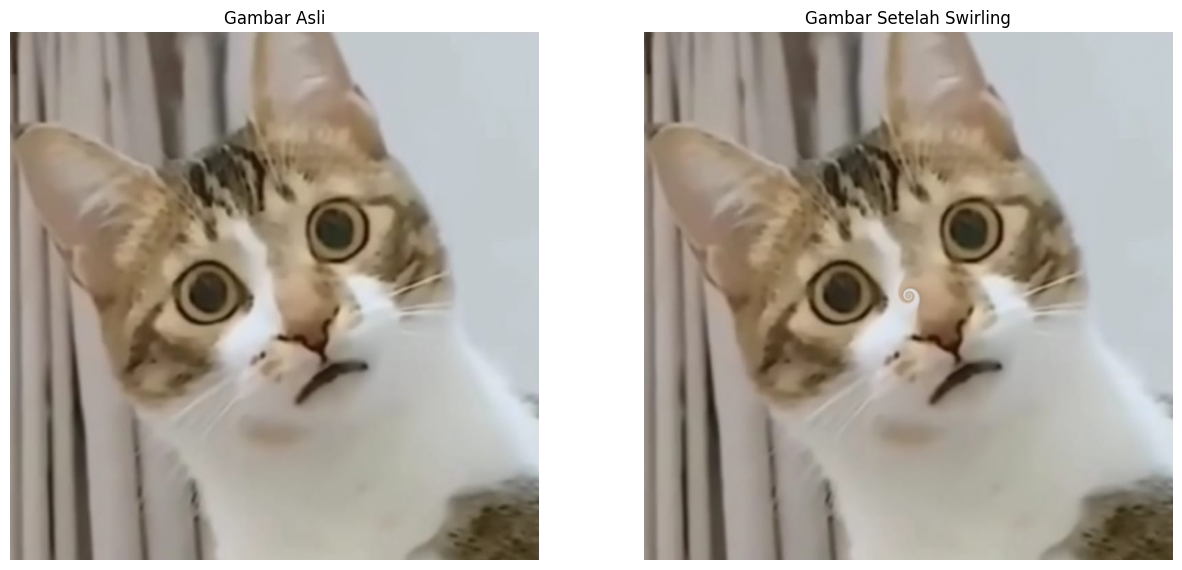

In [13]:
# 1) TRANSFORMASI TWIRL

# Load gambar dari local drive
image = cv2.imread("images/huh_cat.jpg")
RGBimage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Melakukan swirl pada image
swirled = swirl(RGBimage, rotation=0, strength=20, radius=40)

# Membuat figure subplot  dengan ukuran 1 baris dan 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(15, 15))
ax = axes.ravel()

# Menampilkan citra original dan citra hasil averaging
ax[0].imshow(RGBimage)
ax[0].set_title("Gambar Asli")
ax[1].imshow(swirled)
ax[1].set_title("Gambar Setelah Swirling")

# Menghilangkan sumbu x dan y pada kedua gambar
ax[0].axis('off')
ax[1].axis('off')
plt.show()

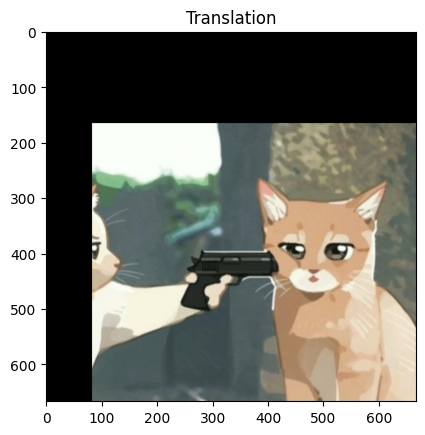

In [3]:
# 2) TRANSLATION

# Load gambar dari local drive
image = cv2.imread("images/kucingditembak.jpg")
RGBimage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

h, w = RGBimage.shape[:2]
half_height, half_width = h//4, w//8
transition_matrix = np.float32([[1, 0, half_width], [0, 1, half_height]])
img_transition = cv2.warpAffine(RGBimage, transition_matrix, (w, h))

plt.imshow(img_transition)
plt.title("Translation")
plt.show()

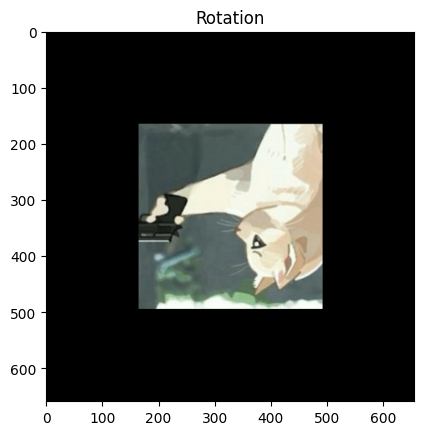

In [4]:
# 3) ROTATION

# Load gambar dari local drive
image = cv2.imread("images/kucingnembak.jpg")
RGBimage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

h, w = RGBimage.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((w/2, h/2), -180, 0.5)

rotated_image = cv2.warpAffine(RGBimage, rotation_matrix, (w, h))

plt.imshow(rotated_image)
plt.title("Rotation")
plt.show()

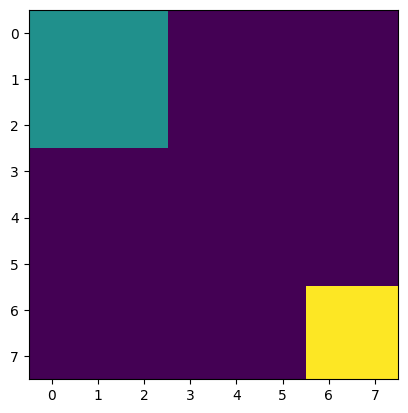

In [5]:
# 4) INTERPOLATION

regions = np.zeros((8, 8), bool)
regions[:3, :3] = 1
regions[6:, 6:] = 1

labeled, nr_objects = mh.label(regions)

plt.imshow(labeled, interpolation='nearest')
plt.show()

In [6]:
labeled,nr_objects = mh.label(regions, np.ones((3,3), bool))
sizes = mh.labeled.labeled_size(labeled)
print('Background size: ', sizes[0])
print('Size of first region: {}'.format(sizes[1]))
print()

array = np.random.random_sample(regions.shape)
sums = mh.labeled_sum(array, labeled)
print("Sum of first region: {}".format(sums[1]))

Background size:  51
Size of first region: 9

Sum of first region: 3.7274829986540534


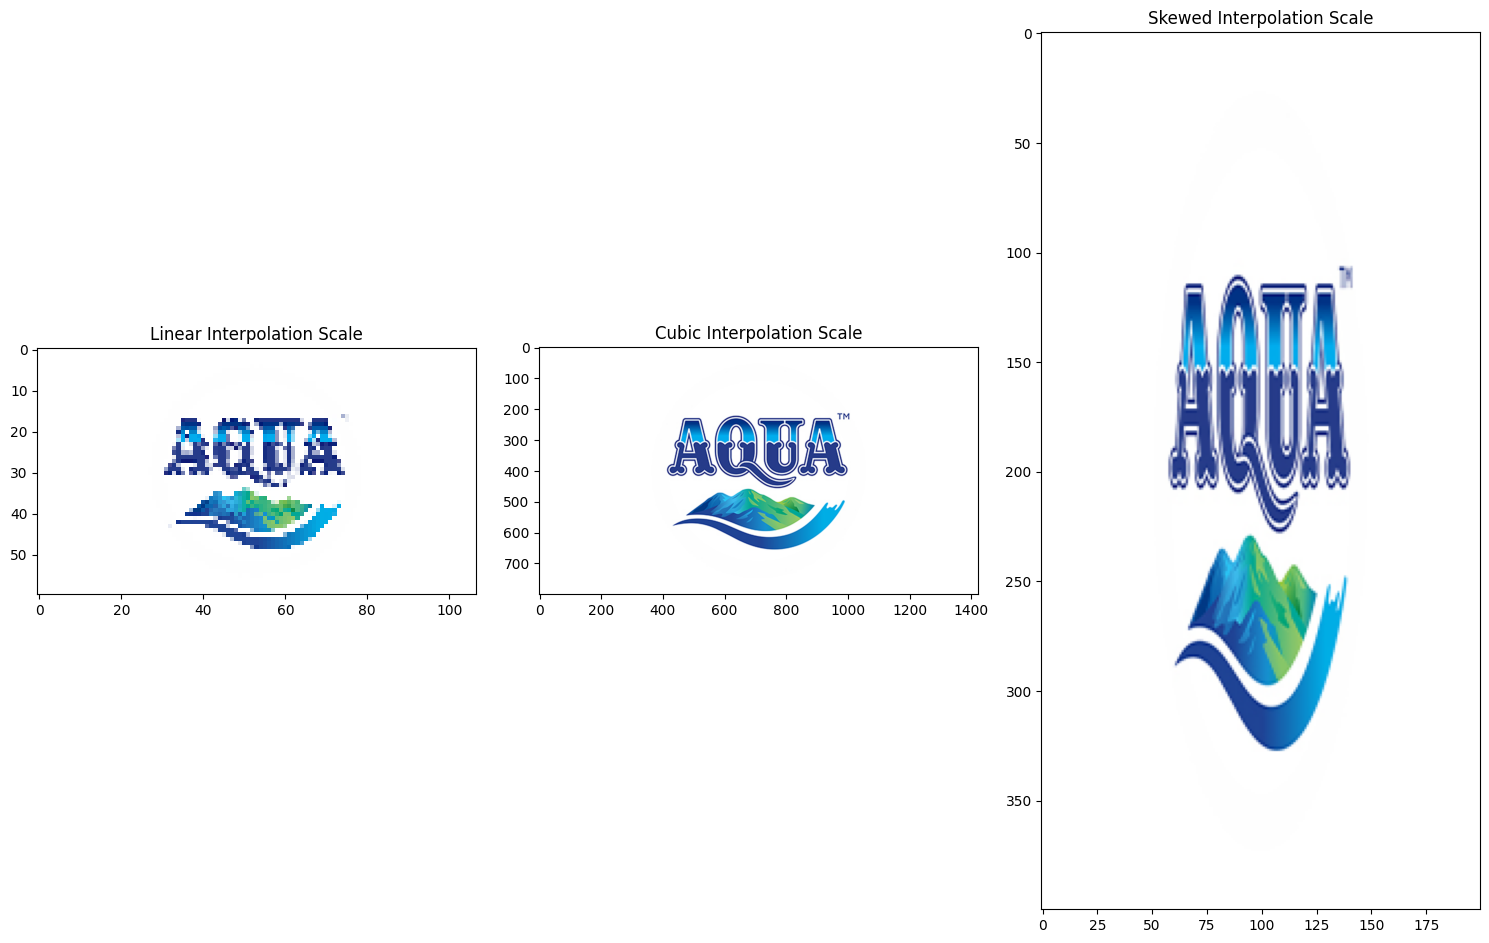

In [7]:
# 5) SKALA INTERPOLASI MIRING

# Load gambar dari local drive
image = cv2.imread("images/aqua.jpg")
RGBimage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 3, figsize=(15, 15))
ax = axes.ravel()

# image size menjadi 0.15 kali dari size aslinya
image_scaled = cv2.resize(RGBimage, None, fx=0.15, fy=0.15)

ax[0].imshow(image_scaled)
ax[0].set_title('Linear Interpolation Scale')

# image size menjadi 2 kali dari size aslinya
image_scaled_2 = cv2.resize(RGBimage, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

ax[1].imshow(image_scaled_2)
ax[1].set_title('Cubic Interpolation Scale')

# image size menjadi 0.15 kali dari size aslinya
image_scaled_3 = cv2.resize(RGBimage, (200, 400), interpolation=cv2.INTER_AREA)

ax[2].imshow(image_scaled_3)
ax[2].set_title('Skewed Interpolation Scale')

fig.tight_layout()
plt.show()